In [24]:
from scipy.stats import shapiro, kstest, ks_2samp
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
#The name of the .csv file must be changed in order to work with related datasets
dt = pd.read_csv('AnaQ5_final.csv')

In [26]:
dt = dt[dt['Answer_Code'].notnull()]

In [27]:
dt

,Answer_Code,Round1,Round2,Round3,Round4,Round5,Round6,Round7,Round8
0,11,243,0,0,0,0,0,0,0
1,12,156,92,0,0,0,0,0,0
2,13,108,67,54,0,0,0,0,0
3,14,283,97,35,40,0,0,0,0
4,15,166,175,52,24,33,0,0,0
5,16,201,263,153,46,16,33,14,0
6,17,16,70,62,55,14,5,15,0
7,18,128,87,116,49,34,9,6,23


### Normality test for Age (Shapiro Wilk Test)

In [28]:
w_statistic, pvalue = shapiro(dt['Round1'])

In [29]:
print('W-statistic:', w_statistic, 'P-value:',pvalue)

W-statistic: 0.983178436756134 P-value: 0.9768936038017273


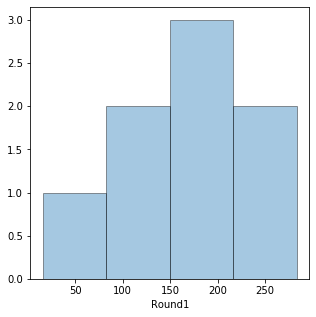

In [44]:
fig, ax = plt.subplots(figsize=(5,5))
sns.distplot(dt['Round1'],kde=False, hist_kws={'edgecolor':'black'})

### Normality test for Round ( Kolmogorov-Smirnov test )

In [32]:
mean = np.mean(dt['Round1'])
std = np.std(dt['Round1'])
no = len(dt)
normal_round = np.random.normal(mean,std,no)

In [33]:
d_statistic, pvalue = kstest(dt['Round1'],'norm',args=(mean,std))

In [34]:
print('D-statistic:', d_statistic, 'P-value:',pvalue)

D-statistic: 0.11570573198764106 P-value: 0.9999238610814217


In [35]:
dt['normal_round'] = normal_round

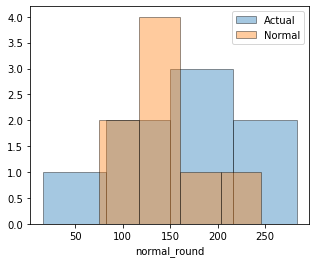

In [43]:
fig, ax = plt.subplots(figsize=(5,4))
sns.distplot(dt['Round1'],kde=False, hist_kws={'edgecolor':'black'})
sns.distplot(dt['normal_round'], kde=False, hist_kws={'edgecolor':'black'})
plt.legend(['Actual','Normal'])

In [48]:
sorted_round = dt['Round1'].sort_values()
normal_round.sort()

In [51]:
p = 1. * np.arange(len(sorted_round)) / (len(sorted_round) - 1)
p_normal = 1 * np.arange(len(normal_round)) / (len(normal_round) - 1)
#Please complete with your own file location to make this code work
p_normal = pd.DataFrame(p_normal, columns=['p_normal']).to_csv('C:\\Users\\**\\**\\**\\file.csv')
p_normal = 1 * np.arange(len(normal_round)) / (len(normal_round) - 1)


Text(0.5, 0, 'Round1')

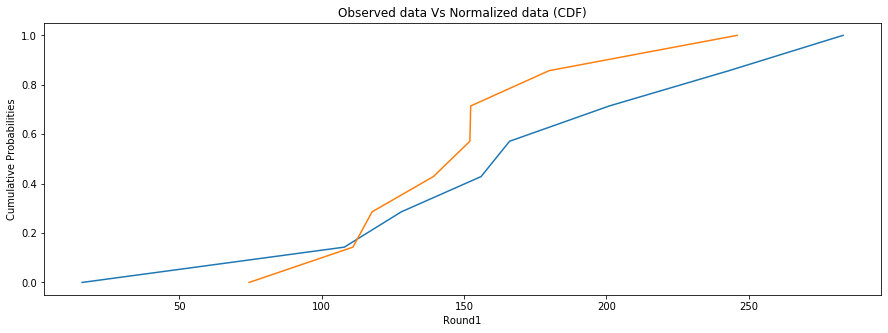

In [52]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(sorted_round, p)
plt.plot(normal_round, p_normal)
plt.title('Observed data Vs Normalized data (CDF)')
plt.ylabel('Cumulative Probabilities')
plt.xlabel('Round1')